## Word2Vec

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
! pip install plotly_express
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
OHCO = ['book_id', 'chap_id', 'para_num', 'sent_num', 'token_num']
PARA = OHCO[:4] # Paragraphs
SENT = OHCO[:5] # Sentences
BAG = PARA
# BAG = SENT

In [6]:
# word2vec parameters
w2v_params = dict(
    window = 5,
    size = 246,
    min_count = 50,
    workers = 4
)

In [7]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

In [8]:
CORPUS_BRITISH = pd.read_csv('/content/drive/MyDrive/Graduate/DS 5001 Final Project/Text Analytics Final/nikita_corpus.csv')
CORPUS_BRITISH = CORPUS_BRITISH.set_index(['book_id','chap_id','para_num','sent_num','token_num'])
CORPUS_BRITISH

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                               
84      29      0        0        0                 ('_To', 'NNP')  NNP   
                                  1                ('Mrs.', 'NNP')  NNP   
                                  2            ('Saville,', 'NNP')  NNP   
                                  3           ('England._', 'NNP')  NNP   
                1        0        0                 ('St.', 'NNP')  NNP   
...                                                            ...  ...   
18247   1       1241     8        39         ('Verney—the', 'NNP')  NNP   
                                  40               ('LAST', 'NNP')  NNP   
                                  41               ('MAN.', 'NNP')  NNP   
                1242     0        0                  ('THE', 'DT')   DT   
                                  1                ('END.', 'NNP')  NNP   

                                              token_str   term_str  
book_id chap_id para_num sent_num token_num                         
84      29      0        0        0                 _To         to  
                                  1                Mrs.        mrs  
                                  2            Saville,    saville  
                                  3           England._    england  
                1        0        0                 St.         st  
...                                                 ...        ...  
18247   1       1241     8        39         Verney—the  verneythe  
                                  40               LAST       last  
                                  41               MAN.        man  
                1242     0        0                 THE        the  
                                  1                END.        end  

[330840 rows x 4 columns]

In [9]:
CORPUS_BRITISH.reset_index().book_id.unique()

array([   84,   201,  5230, 18247])

In [10]:
TOKENS = CORPUS_BRITISH

In [11]:
TOKENS

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                               
84      29      0        0        0                 ('_To', 'NNP')  NNP   
                                  1                ('Mrs.', 'NNP')  NNP   
                                  2            ('Saville,', 'NNP')  NNP   
                                  3           ('England._', 'NNP')  NNP   
                1        0        0                 ('St.', 'NNP')  NNP   
...                                                            ...  ...   
18247   1       1241     8        39         ('Verney—the', 'NNP')  NNP   
                                  40               ('LAST', 'NNP')  NNP   
                                  41               ('MAN.', 'NNP')  NNP   
                1242     0        0                  ('THE', 'DT')   DT   
                                  1                ('END.', 'NNP')  NNP   

                                              token_str   term_str  
book_id chap_id para_num sent_num token_num                         
84      29      0        0        0                 _To         to  
                                  1                Mrs.        mrs  
                                  2            Saville,    saville  
                                  3           England._    england  
                1        0        0                 St.         st  
...                                                 ...        ...  
18247   1       1241     8        39         Verney—the  verneythe  
                                  40               LAST       last  
                                  41               MAN.        man  
                1242     0        0                 THE        the  
                                  1                END.        end  

[330840 rows x 4 columns]

In [12]:
TOKENS[TOKENS["term_str"].apply(lambda x: isinstance(x, float))]

pos_tuple pos  \
book_id chap_id para_num sent_num token_num                            
84      30      1        0        0          ('Archangel,', '$')   $   
        34      5        1        4               ('life,', '$')   $   
        53      7        1        44                ('——', 'NN')  NN   
201     1       0        0        0                  ('|', 'JJ')  JJ   
                                  10                 ('|', 'NN')  NN   
...                                                          ...  ..   
18247   1       865      8        16                 ('—', 'NN')  NN   
                907      5        52                  (')', ')')   )   
                951      3        21              ('this,', '$')   $   
                984      1        16                 ('”', 'VB')  VB   
                1036     5        19                  ('.', '.')   .   

                                              token_str term_str  
book_id chap_id para_num sent_num token_num                       
84      30      1        0        0          Archangel,      NaN  
        34      5        1        4               life,      NaN  
        53      7        1        44                 ——      NaN  
201     1       0        0        0                   |      NaN  
                                  10                  |      NaN  
...                                                 ...      ...  
18247   1       865      8        16                  —      NaN  
                907      5        52                  )      NaN  
                951      3        21              this,      NaN  
                984      1        16                  ”      NaN  
                1036     5        19                  .      NaN  

[520 rows x 4 columns]

In [13]:
TOKENS

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                               
84      29      0        0        0                 ('_To', 'NNP')  NNP   
                                  1                ('Mrs.', 'NNP')  NNP   
                                  2            ('Saville,', 'NNP')  NNP   
                                  3           ('England._', 'NNP')  NNP   
                1        0        0                 ('St.', 'NNP')  NNP   
...                                                            ...  ...   
18247   1       1241     8        39         ('Verney—the', 'NNP')  NNP   
                                  40               ('LAST', 'NNP')  NNP   
                                  41               ('MAN.', 'NNP')  NNP   
                1242     0        0                  ('THE', 'DT')   DT   
                                  1                ('END.', 'NNP')  NNP   

                                              token_str   term_str  
book_id chap_id para_num sent_num token_num                         
84      29      0        0        0                 _To         to  
                                  1                Mrs.        mrs  
                                  2            Saville,    saville  
                                  3           England._    england  
                1        0        0                 St.         st  
...                                                 ...        ...  
18247   1       1241     8        39         Verney—the  verneythe  
                                  40               LAST       last  
                                  41               MAN.        man  
                1242     0        0                 THE        the  
                                  1                END.        end  

[330840 rows x 4 columns]

In [14]:
VOCAB = CORPUS_BRITISH.term_str.value_counts().to_frame('n').sort_index()
VOCAB.index.name = 'term_str'
VOCAB['max_pos'] = CORPUS_BRITISH[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)
VOCAB

,n,max_pos
term_str,,
0,3,CD
1,12,CD
10,6,CD
1000,1,CD
11,3,CD
...,...,...
à,3,NNP
éclat,1,NN
œdipus,4,NN


In [15]:
VOCAB.to_csv('/content/drive/MyDrive/Graduate/DS 5001 Final Project/Text Analytics Final/vocab.csv')

In [16]:
DOCS = TOKENS[~TOKENS.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS = [doc for doc in DOCS if len(doc) > 1] # Lose single word docs

In [17]:
DOCS

[['11th', '17'],
 ['you',
  'will',
  'rejoice',
  'to',
  'hear',
  'that',
  'no',
  'disaster',
  'has',
  'accompanied',
  'the',
  'commencement',
  'of',
  'an',
  'enterprise',
  'which',
  'you',
  'have',
  'regarded',
  'with',
  'such',
  'evil',
  'forebodings'],
 ['i',
  'arrived',
  'here',
  'yesterday',
  'and',
  'my',
  'first',
  'task',
  'is',
  'to',
  'assure',
  'my',
  'dear',
  'sister',
  'of',
  'my',
  'welfare',
  'and',
  'increasing',
  'confidence',
  'in',
  'the',
  'success',
  'of',
  'my',
  'undertaking'],
 ['i',
  'am',
  'already',
  'far',
  'north',
  'of',
  'and',
  'as',
  'i',
  'walk',
  'in',
  'the',
  'streets',
  'of',
  'i',
  'feel',
  'a',
  'cold',
  'northern',
  'breeze',
  'play',
  'upon',
  'my',
  'cheeks',
  'which',
  'braces',
  'my',
  'nerves',
  'and',
  'fills',
  'me',
  'with',
  'delight'],
 ['do', 'you', 'understand', 'this', 'feeling'],
 ['this',
  'breeze',
  'which',
  'has',
  'travelled',
  'from',
  'the',
 

In [18]:
# British Corpus Word 2 Vec
brit_w2v = word2vec.Word2Vec(DOCS, vector_size=256, window=2, min_count=50)
brit_w2v

In [19]:
brit_coords = pd.DataFrame(dict(vector = [brit_w2v.wv.get_vector(w) for w in brit_w2v.wv.key_to_index], term_str = brit_w2v.wv.key_to_index.keys())).set_index('term_str')
brit_coords = brit_coords.merge(VOCAB.reset_index(), on="term_str")
brit_coords

,term_str,vector,n,max_pos
0,the,"[0.07828847, -0.087720774, 0.06964929, 0.20309...",20756,DT
1,of,"[-0.0417248, -0.24927965, 0.027553376, 0.05127...",12461,IN
2,and,"[-0.021065885, -0.12653178, 0.08539509, 0.0338...",12152,CC
3,to,"[-0.04076903, -0.11426188, 0.13416724, -0.0405...",9153,TO
4,i,"[-0.18689032, -0.089736655, 0.14991263, 0.0624...",7314,PRP
...,...,...,...,...
642,carried,"[0.008024452, -0.09368096, 0.04461505, 0.07720...",50,VBD
643,move,"[-0.014770665, -0.09921922, 0.08461982, 0.0880...",50,VB
644,creatures,"[-0.00846838, -0.109536074, 0.08464416, 0.0746...",50,NN
645,walls,"[0.0043169893, -0.10729536, 0.068299234, 0.075...",50,NNS


In [20]:
tsne_engine = TSNE(learning_rate = 200, perplexity = 20, n_components = 2, init = 'pca', n_iter = 1000, random_state = 42)

In [21]:
british_vectors = np.array(brit_coords.vector.to_list())
brit_tsne_model = tsne_engine.fit_transform(british_vectors)
brit_coords['x'] = brit_tsne_model[:,0]
brit_coords['y'] = brit_tsne_model[:,1]
brit_coords

,term_str,vector,n,max_pos,x,y
0,the,"[0.07828847, -0.087720774, 0.06964929, 0.20309...",20756,DT,-36.501812,23.087919
1,of,"[-0.0417248, -0.24927965, 0.027553376, 0.05127...",12461,IN,-57.314384,-0.286756
2,and,"[-0.021065885, -0.12653178, 0.08539509, 0.0338...",12152,CC,-45.149410,2.242029
3,to,"[-0.04076903, -0.11426188, 0.13416724, -0.0405...",9153,TO,46.211658,6.726067
4,i,"[-0.18689032, -0.089736655, 0.14991263, 0.0624...",7314,PRP,41.550602,13.056269
...,...,...,...,...,...,...
642,carried,"[0.008024452, -0.09368096, 0.04461505, 0.07720...",50,VBD,15.077031,16.254230
643,move,"[-0.014770665, -0.09921922, 0.08461982, 0.0880...",50,VB,31.568502,0.637923
644,creatures,"[-0.00846838, -0.109536074, 0.08464416, 0.0746...",50,NN,7.412093,-8.855714
645,walls,"[0.0043169893, -0.10729536, 0.068299234, 0.075...",50,NNS,-17.967489,-5.157745


In [22]:
if brit_coords.shape[1] == 3:
    brit_coords = brit_coords.merge(VOCAB.reset_index(), on='term_str')
    brit_coords = brit_coords.set_index('term_str')

In [23]:
px.scatter(brit_coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

## Principal Component Analysis

In [24]:
OHCO = ['book_id','chap_id','para_num','sent_num','token_num']

SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]


def get_bow(corpus, bag):
    SENTS = OHCO[:4]
    PARAS = OHCO[:3]
    CHAPS = OHCO[:2]
    BOOKS = OHCO[:1]
    
    BOW = corpus.groupby(bag+['term_str']).term_str.count().to_frame('n')
    
    return BOW

idf_method = 'standard'   


def calc_tfidf(BOW, tf_method):
    DTCM = BOW.n.unstack().fillna(0).astype('int')
    DF = DTCM.astype('bool').sum()

    
    if tf_method == 'sum':
        TF = DTCM.T / DTCM.T.sum()
    elif tf_method == 'max':
        TF = DTCM.T / DTCM.T.max()
    elif tf_method == 'log':
        TF = np.log2(1 + DTCM.T)
    elif tf_method == 'raw':
        TF = DTCM.T
    elif tf_method == 'double_norm':
        TF = DTCM.T / DTCM.T.max()
    elif tf_method == 'binary':
        TF = DTCM.T.astype('bool').astype('int')
    TF = TF.T
    
        
    N = DTCM.shape[0]
    
    if idf_method == 'standard':
        IDF = np.log2(N / DF)
    elif idf_method == 'max':
        IDF = np.log2(DF.max() / DF) 
    elif idf_method == 'smooth':
        IDF = np.log2((1 + N) / (1 + DF)) + 1
        
 

    TFIDF = TF * IDF
    
    DFIDF = (DF * IDF)

    #bow_copy = BOW.copy()
    #bow_copy['tf'] = TF.stack()
    #bow_copy['tfidf'] = TFIDF.stack()
    #bow_copy['dfidf'] = DFIDF
    
    return TFIDF, DFIDF

In [25]:
BOW = get_bow(CORPUS_BRITISH, CHAPS)
TFIDF, DFIDF = calc_tfidf(BOW, "max")
VOCAB['dfidf'] = DFIDF
BOW['tfidf'] = TFIDF.stack()

In [26]:
TFIDFS = TFIDF.reset_index().stack()[2:].groupby('term_str').mean()
VOCAB['tfidf'] = TFIDFS

In [27]:
VOCAB.to_csv('vocab.csv', encoding = 'utf-8-sig') 
files.download('vocab.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
DOC_british = pd.DataFrame(index=TFIDF.index)

In [29]:
top_terms = VOCAB.sort_values('dfidf', ascending = False).head(1000)
top_terms = top_terms.index
reduced_TFIDF_british = TFIDF[top_terms]
reduced_TFIDF_british

term_str            doubt      soul     above  everything     forth     means  \
book_id chap_id                                                                 
84      29       0.000000  0.043395  0.000000    0.000000  0.000000  0.000000   
        30       0.000000  0.025504  0.000000    0.000000  0.000000  0.000000   
        31       0.000000  0.000000  0.000000    0.000000  0.000000  0.000000   
        32       0.011013  0.044052  0.011013    0.011013  0.000000  0.000000   
        33       0.000000  0.000000  0.019383    0.019383  0.019383  0.058149   
...                   ...       ...       ...         ...       ...       ...   
5230    43       0.037923  0.000000  0.000000    0.012641  0.000000  0.000000   
        44       0.000000  0.000000  0.000000    0.010768  0.000000  0.005384   
        46       0.008919  0.000000  0.017837    0.000000  0.000000  0.000000   
        47       0.000000  0.000000  0.000000    0.000000  0.000000  0.000000   
18247   1        0.002598  0.011950  0.006235    0.001039  0.007404  0.004286   

term_str          minutes    desire  miserable     sleep  ...  solitary  \
book_id chap_id                                           ...             
84      29       0.000000  0.000000   0.000000  0.021697  ...  0.000000   
        30       0.000000  0.025504   0.000000  0.000000  ...  0.000000   
        31       0.000000  0.132156   0.000000  0.000000  ...  0.000000   
        32       0.000000  0.022026   0.000000  0.000000  ...  0.000000   
        33       0.000000  0.019383   0.000000  0.000000  ...  0.000000   
...                   ...       ...        ...       ...  ...       ...   
5230    43       0.000000  0.000000   0.000000  0.012641  ...  0.000000   
        44       0.010768  0.000000   0.000000  0.005384  ...  0.000000   
        46       0.008919  0.000000   0.000000  0.008919  ...  0.000000   
        47       0.000000  0.000000   0.000000  0.000000  ...  0.000000   
18247   1        0.000909  0.005196   0.004156  0.004027  ...  0.004499   

term_str           senses       dim    circle     torn  apartment  \
book_id chap_id                                                     
84      29       0.000000  0.000000  0.000000  0.00000    0.00000   
        30       0.000000  0.000000  0.000000  0.00000    0.00000   
        31       0.000000  0.000000  0.000000  0.00000    0.00000   
        32       0.000000  0.000000  0.019075  0.00000    0.00000   
        33       0.000000  0.000000  0.000000  0.00000    0.00000   
...                   ...       ...       ...      ...        ...   
5230    43       0.000000  0.000000  0.021894  0.00000    0.00000   
        44       0.000000  0.000000  0.000000  0.00000    0.00000   
        46       0.000000  0.015447  0.015447  0.00000    0.00000   
        47       0.000000  0.000000  0.000000  0.00000    0.00000   
18247   1        0.004724  0.002475  0.003824  0.00225    0.00135   

term_str         interrupted     miles   england   alarmed  
book_id chap_id                                             
84      29           0.00000  0.000000  0.037580  0.000000  
        30           0.00000  0.000000  0.044173  0.044173  
        31           0.00000  0.000000  0.686686  0.000000  
        32           0.00000  0.019075  0.019075  0.000000  
        33           0.00000  0.000000  0.000000  0.000000  
...                      ...       ...       ...       ...  
5230    43           0.00000  0.065683  0.000000  0.000000  
        44           0.00000  0.000000  0.000000  0.000000  
        46           0.00000  0.015447  0.000000  0.000000  
        47           0.00000  0.000000  0.055952  0.000000  
18247   1            0.00225  0.003599  0.029471  0.000900  

[63 rows x 1000 columns]

In [30]:
from sklearn.decomposition import PCA
from scipy.linalg import norm
from scipy.linalg import eigh

def calc_pca(X, k, norm_docs, center_by_mean, center_by_variance):
    
    L2 = X
    if norm_docs == True:
        L2 = (L2.T / norm(L2, 2, axis=1)).T
    else:
        L2 = L2
    
    if center_by_mean == True:
        L2 = L2 - L2.mean()
    else:
        L2 = L2
    
    if center_by_variance == True:
        L2 = L2 - L2.var()
    else:
        L2 = L2
    
    COV = L2.T.dot(L2) / (L2.shape[0] - 1)
    
    eig_vals, eig_vecs = eigh(COV)
    
    EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
    EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
    EIG_VAL.index.name = 'term_str'
    
    EIG_VEC_PAIRS = EIG_VEC.stack().sort_values(ascending=False).to_frame('covariance')
    EIG_VEC_PAIRS.index.names = ['term1', 'term2']
    
    EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)
    EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)
    
    COMPS = EIG_PAIRS.sort_values('exp_var', ascending=False).head(k).reset_index(drop=True)
    COMPS.index.name = 'comp_id'
    COMPS.index = ["PC{}".format(i) for i in COMPS.index.tolist()]
    COMPS.index.name = 'pc_id'
    
    LOADINGS = COMPS[COV.index].T
    LOADINGS.index.name = 'term_str'
    
    DCM = L2.dot(COMPS[COV.index].T)
    
    LIB_COLS = ['genre_id', 'author_id']
    
    #DCM = DCM.join(LIB[LIB_COLS], on='book_id')
    
    #DCM['doc'] = DCM.apply(lambda x: f"{x.label} {str(x.name[1]).zfill(2)}", 1)
    
    COMPINF = COMPS
    
    return LOADINGS, DCM, COMPINF

In [31]:
LOADINGS, DCM, COMPINF = calc_pca(reduced_TFIDF_british, 10, True, False, False)

import plotly_express as px
import seaborn as sns

sns.set(style = 'ticks')

DCM['origin'] = 'British'

new_dcm = DCM.reset_index()

LIB = pd.read_csv('/content/drive/MyDrive/Graduate/DS 5001 Final Project/Text Analytics Final/lib.csv')

total_dcm = new_dcm.merge(LIB, how='left')

px.box(total_dcm, x='title', y='PC0', height=500, color='origin')

In [32]:
px.box(total_dcm, x='origin', y='PC0', height=500, color='origin')

In [33]:
stacked_dcm = pd.DataFrame(total_dcm.groupby('origin').mean().drop(['book_id', 'chap_id'], axis=1).stack())

stacked_dcm.index.names = ['Origin', 'Principle Component']

stacked_dcm = stacked_dcm.reset_index().rename(columns={0:'value'})

fig = px.bar(stacked_dcm, x="Principle Component", color="Origin",
             y='value',
             title="Mean Principle Component Values, Grouped by Book Origin",
             barmode='group',
             height=600
            )
fig.update_layout(yaxis_range=[-0.4,0.2])
fig.show()

In [34]:
COMPINF.to_csv('british_components.csv', encoding = 'utf-8-sig') 
LOADINGS.to_csv('british_loadings.csv', encoding = 'utf-8-sig')
LOADINGS.sort_values('PC0', ascending = False)

pc_id,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
term_str,,,,,,,,,,
exposed,-0.011620,0.001462,-0.002703,0.005957,0.004643,0.016688,-0.004008,0.016406,-0.011850,0.021119
infinite,-0.011820,-0.007547,-0.013205,0.002865,-0.013922,0.015097,0.005726,0.021334,0.033177,0.013924
touched,-0.012181,0.000369,-0.009283,0.001932,-0.007678,0.006784,0.002135,0.007797,0.010295,0.005982
wont,-0.012240,-0.018905,0.016001,-0.010159,-0.001800,-0.010270,0.006991,-0.009915,-0.009040,-0.015620
shattered,-0.012365,0.001309,-0.000009,-0.019665,-0.007222,0.006969,0.009276,0.004640,-0.008718,-0.014219
...,...,...,...,...,...,...,...,...,...,...
hall,-0.126333,-0.227806,0.401170,0.346889,0.087894,-0.112281,0.113419,-0.104703,-0.084986,0.001761
our,-0.135608,0.116748,-0.015746,-0.014202,-0.171251,-0.198249,-0.050196,0.046549,0.004856,-0.017122
mr,-0.144359,-0.253745,0.339734,-0.285428,0.052235,-0.034354,0.079589,-0.070495,0.043730,-0.267471


In [52]:
COMPINF

,eig_val,doubt,soul,above,everything,forth,means,minutes,desire,miserable,...,senses,dim,circle,torn,apartment,interrupted,miles,england,alarmed,exp_var
pc_id,,,,,,,,,,,,,,,,,,,,,
PC0,0.200347,-0.023621,-0.045339,-0.025642,-0.021043,-0.026697,-0.032620,-0.018875,-0.028309,-0.058039,...,-0.014954,-0.015080,-0.038479,-0.012757,-0.019231,-0.013911,-0.020187,-0.045274,-0.015697,19.72
PC1,0.106165,-0.009401,0.034634,0.003735,-0.016714,0.006707,0.016509,-0.012757,0.022872,0.056093,...,0.013396,-0.009101,0.000842,-0.004828,0.012554,0.003863,-0.000226,0.038659,0.000837,10.45
PC2,0.068671,-0.011295,-0.005652,-0.005926,0.013049,0.000841,-0.007838,0.003473,-0.002881,-0.007043,...,-0.001443,0.010141,0.007755,0.006124,-0.002383,-0.003669,-0.003238,-0.006668,0.008168,6.76
PC3,0.044279,-0.003717,-0.002010,-0.003765,0.005464,-0.000920,0.008204,-0.000383,0.000080,-0.026618,...,-0.000234,0.017331,0.012831,-0.004702,0.000700,-0.005533,-0.014877,-0.006232,-0.017449,4.36
PC4,0.030105,-0.010208,-0.007023,-0.028981,-0.006214,0.005574,-0.011116,-0.002130,-0.015424,0.029256,...,-0.002644,-0.006685,-0.238548,0.007763,-0.003355,-0.005052,-0.026499,-0.051918,-0.002018,2.96
PC5,0.027574,0.000438,-0.044107,0.001277,0.012335,0.041600,0.020526,0.021184,-0.026391,0.025093,...,0.017265,0.001908,0.002294,-0.001328,0.017227,0.016898,0.028125,-0.137355,-0.004409,2.71
PC6,0.024501,0.005815,0.007543,0.000162,0.000344,-0.013370,-0.053265,0.002020,0.000219,0.115798,...,-0.006929,-0.004483,-0.062801,0.009651,-0.013394,0.009317,0.014073,0.027099,-0.010270,2.41
PC7,0.023399,0.020596,-0.031850,0.039526,0.005066,-0.005526,0.010276,0.013499,-0.041338,-0.003496,...,-0.009200,0.028703,0.095047,0.003465,0.018596,0.008405,0.053491,-0.139559,-0.007158,2.30
PC8,0.021461,0.007095,0.060603,-0.002203,0.014529,-0.003036,-0.049085,0.013130,0.011297,-0.034448,...,-0.008194,0.020958,-0.096138,-0.017737,0.021711,-0.015673,0.075904,0.124738,0.020086,2.11


## Sentiment Analysis

In [35]:
syuzhet = pd.read_csv('/content/drive/MyDrive/Graduate/DS 5001 Final Project/Text Analytics Final/salex_syuzhet.csv')

syuzhet.dtypes

syuz_british = VOCAB.reset_index().merge(syuzhet).drop('n', axis=1)

bow_brit = BOW.reset_index()

new_bow = bow_brit.merge(syuz_british, on='term_str').dropna().set_index(['book_id', 'chap_id', 'term_str'])

new_bow['origin'] = 'British'

In [36]:
# Weight by TFIDF

new_bow['weighted_sentiment'] = new_bow['tfidf_x'] * new_bow['syu_sentiment']

total_bow = new_bow.reset_index().merge(LIB, how='left')

sentiment_df = pd.DataFrame(total_bow.groupby('origin')['weighted_sentiment'].mean()).reset_index()

book_df = pd.DataFrame(total_bow.groupby(['title', 'origin'])['weighted_sentiment'].mean()).reset_index()

fig = px.bar(book_df, x="title", color="origin",
             y='weighted_sentiment',
             title="Mean Syuzhet Sentiment Values, Grouped by Book",
             barmode='group',
             height=600
            )
fig.show()

In [37]:
px.box(book_df, x='origin', y='weighted_sentiment', height=500, color='origin')

In [38]:
bow_csv = total_bow.drop(['tfidf_y', 'book_id', 'chap_id', 'title'], axis = 1).groupby('term_str').mean()

bow_csv.to_csv('vocab_sentiment.csv', encoding = 'utf-8-sig') 
files.download('vocab_sentiment.csv')

book_df.to_csv('book_sentiment.csv', encoding = 'utf-8-sig') 
files.download('book_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
bow_csv.head(5)

,n,tfidf_x,dfidf,syu_sentiment,weighted_sentiment
term_str,,,,,
abandon,1.000000,0.023150,9.954560,-0.75,-0.017362
abandoned,2.500000,0.026620,20.353905,-0.50,-0.013310
abandonment,2.000000,0.022307,9.954560,-0.25,-0.005577
abhor,1.666667,0.054018,13.176952,-0.50,-0.027009
abhorred,1.500000,0.027870,23.818239,-1.00,-0.027870


In [40]:
book_df

,title,origin,weighted_sentiment
0,Flatland: A Romance of Many Dimensions,British,0.000978
1,Frankenstein,British,0.000248
2,The Invisible Man,British,-0.003968
3,The Last Man,British,-0.000075


## Latent Dirichlet Allocation

In [41]:
#ngram_range = [1,2]
TOKENS[TOKENS["term_str"].apply(lambda x: isinstance(x, float))]

TOKENS['term_str'] = TOKENS['token_str'].str.lower().str.replace(r'[\W_]', '', regex=True).dropna()

DOCS_brit2 = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(PARAS).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})

n_terms = 4000
n_topics = 10
max_iter = 20
n_top_terms = 9

count_engine = CountVectorizer(max_features=n_terms, ngram_range=(1,2), stop_words='english')
count_model_brit = count_engine.fit_transform(DOCS_brit2.doc_str)

TERMS = count_engine.get_feature_names_out()

DTM_brit = pd.DataFrame(count_model_brit.toarray(), index=DOCS_brit2.index, columns=TERMS)

VOCAB['doc_count'] = DTM_brit.astype('bool').astype('int').sum()
DOCS_brit2['term_count'] = DTM_brit.sum(1)

In [42]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

TNAMES = [f"T{str(x).zfill(len(str(n_topics)))}" for x in range(n_topics)]

lda_model = lda_engine.fit_transform(count_model_brit)

THETA = pd.DataFrame(lda_model, index=DOCS_brit2.index)
THETA.columns.name = 'topic_id'
THETA.columns = TNAMES

PHI = pd.DataFrame(lda_engine.components_, columns=TERMS, index=TNAMES)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [54]:
PHI.head()

term_str,abandoned,abandonment,abdication,abdication king,abhorrence,ability,abode,abodes,abruptly,absence,...,yonder,youd,young,younger,youre,youth,youth hopes,zeal,zest,œdipus
topic_id,,,,,,,,,,,,,,,,,,,,,
T00,0.100005,0.100000,0.100005,0.100013,0.100001,0.100000,0.100016,1.099920,0.1,1.014437,...,0.100000,0.100001,0.100000,0.100030,0.100001,5.905417,1.099980,0.100024,0.100000,0.100000
T01,1.099991,0.100050,0.100012,0.100009,7.099939,0.100038,22.647189,0.100004,0.1,18.006883,...,0.100004,0.100000,5.861380,0.100036,0.100000,46.011712,0.100023,0.100046,0.100013,0.100000
T02,0.100000,0.100000,0.100000,0.100000,0.100000,0.100032,0.100014,4.099940,0.1,2.222671,...,3.922737,0.100000,0.100034,0.100000,0.100000,4.621698,0.100002,2.099958,0.100000,0.100000
T03,0.100008,0.100000,0.100000,0.100000,0.100008,1.099956,3.029299,0.100073,0.1,0.767979,...,0.100000,0.100000,0.100006,1.354997,0.100000,1.912658,0.100000,1.245223,1.100001,0.100000
T04,2.099996,1.336874,0.100000,0.100000,0.100014,3.099925,5.444600,1.099998,0.1,0.100015,...,0.152938,0.100002,1.338567,0.100000,0.100000,3.954252,0.100000,0.100007,0.100000,3.099999


In [43]:
TOPICS = PHI.stack().to_frame('topic_weight').groupby('topic_id')\
    .apply(lambda x: x.sort_values('topic_weight', ascending=False)\
        .head(n_top_terms).reset_index().drop('topic_id', axis=1)['term_str'])
    
TOPICS['label'] = TOPICS.apply(lambda x: x.name + ' ' + ', '.join(x[:n_top_terms]), 1)

In [44]:
TOPICS['doc_weight_sum_brit'] = THETA.sum()
TOPICS['term_freq'] = PHI.sum(1) / PHI.sum(1).sum()

In [55]:
TOPICS.head()

term_str,0,1,2,3,4,5,6,7,8,label,doc_weight_sum_brit,term_freq
topic_id,,,,,,,,,,,,
T00,door,room,house,head,face,man,hand,window,moment,"T00 door, room, house, head, face, man, hand, ...",411.595845,0.087919
T01,heart,life,love,mind,time,father,years,eyes,affection,"T01 heart, life, love, mind, time, father, yea...",505.731137,0.182578
T02,nature,words,time,people,hand,heart,man,men,matter,"T02 nature, words, time, people, hand, heart, ...",288.065053,0.068614
T03,sea,sun,wind,heart,day,earth,night,trees,waves,"T03 sea, sun, wind, heart, day, earth, night, ...",316.159082,0.118245
T04,life,man,day,eyes,time,sight,moment,city,heart,"T04 life, man, day, eyes, time, sight, moment,...",317.342492,0.116046


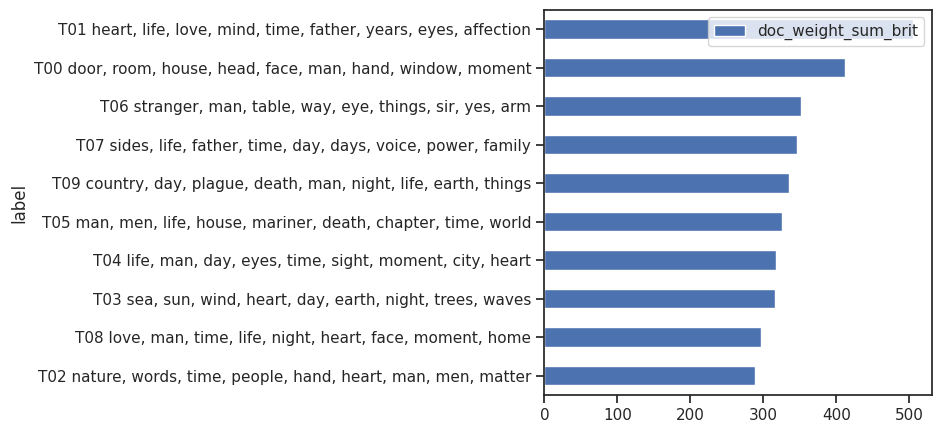

In [45]:
TOPICS.sort_values('doc_weight_sum_brit', ascending=True).plot.barh(y='doc_weight_sum_brit', x='label', figsize=(5, n_topics/2));

In [46]:
fig = px.scatter(TOPICS, x='doc_weight_sum_brit', y='term_freq', color = TOPICS.index)

fig.show()

In [47]:
# import dataframe_image as dfi

colors = "YlGnBu"
THETA.sample(20).style.background_gradient(cmap=colors, axis=None)

In [48]:
THETA.to_csv('topics.csv', encoding = 'utf-8-sig') 
files.download('topics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
THETA.head()

T00       T01       T02       T03       T04  \
book_id chap_id para_num                                                     
84      29      2         0.009091  0.475304  0.009093  0.451959  0.009093   
                3         0.001250  0.001250  0.001251  0.362882  0.001250   
                4         0.002779  0.385952  0.002779  0.002778  0.400907   
                5         0.005883  0.823040  0.129895  0.005883  0.005884   
                6         0.003847  0.003847  0.003848  0.497071  0.003847   

                               T05       T06       T07       T08       T09  
book_id chap_id para_num                                                    
84      29      2         0.009091  0.009091  0.009093  0.009093  0.009092  
                3         0.001250  0.001250  0.001251  0.001250  0.627115  
                4         0.002779  0.002779  0.193691  0.002779  0.002778  
                5         0.005883  0.005883  0.005883  0.005884  0.005883  
                6         0.472153  0.003847  0.003847  0.003847  0.003847

In [49]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,label,doc_weight_sum_brit,term_freq
topic_id,,,,,,,,,,,,
T00,door,room,house,head,face,man,hand,window,moment,"T00 door, room, house, head, face, man, hand, ...",411.595845,0.087919
T01,heart,life,love,mind,time,father,years,eyes,affection,"T01 heart, life, love, mind, time, father, yea...",505.731137,0.182578
T02,nature,words,time,people,hand,heart,man,men,matter,"T02 nature, words, time, people, hand, heart, ...",288.065053,0.068614
T03,sea,sun,wind,heart,day,earth,night,trees,waves,"T03 sea, sun, wind, heart, day, earth, night, ...",316.159082,0.118245
T04,life,man,day,eyes,time,sight,moment,city,heart,"T04 life, man, day, eyes, time, sight, moment,...",317.342492,0.116046
T05,man,men,life,house,mariner,death,chapter,time,world,"T05 man, men, life, house, mariner, death, cha...",325.849296,0.075629
T06,stranger,man,table,way,eye,things,sir,yes,arm,"T06 stranger, man, table, way, eye, things, si...",351.250004,0.055869
T07,sides,life,father,time,day,days,voice,power,family,"T07 sides, life, father, time, day, days, voic...",346.216761,0.100189
T08,love,man,time,life,night,heart,face,moment,home,"T08 love, man, time, life, night, heart, face,...",297.379849,0.069351
